---
title: Lab 4- Meals
author: Alexa Dandridge
format:
    html:
        embed-resources: true
        code-line numbers: true

---
**GitHub Repository** <https://github.com/alexadandridge/Positron-Class-Week-0->

**1. Data from Unstructured Websites**

In [ ]:
# Reading in the URL using the requests library
import requests
import pandas as pd
from bs4 import BeautifulSoup

# This is the URL
URL = "https://tastesbetterfromscratch.com/meal-plan-210/"
# We add in these headers so the website knows we are not a bot when requesting information
HEADERS = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"}

# Actually using the requests library
response = requests.get(URL, headers=HEADERS)

In [24]:
# Using BeautifulSoup to parse this string into a tree called soup
soup = BeautifulSoup(response.text, "html.parser")

In [ ]:
# Printing soup
soup

<!DOCTYPE html>
<html lang="en-US">
<head><script data-cfasync="false" data-no-optimize="1">!function(){"use strict";const t={adt_ei:{identityApiKey:"plainText",source:"url",type:"plaintext",priority:1},adt_eih:{identityApiKey:"sha256",source:"urlh",type:"hashed",priority:2},sh_kit:{identityApiKey:"sha256",source:"urlhck",type:"hashed",priority:3}},e=Object.keys(t);function i(t){return function(t){const e=t.match(/((?=([a-z0-9._!#$%+^&*()[\]<>-]+))\2@[a-z0-9._-]+\.[a-z0-9._-]+)/gi);return e?e[0]:""}(function(t){return t.replace(/\s/g,"")}(t.toLowerCase()))}!async function(){const n=new URL(window.location.href),o=n.searchParams;let a=null;const r=Object.entries(t).sort(([,t],[,e])=>t.priority-e.priority).map(([t])=>t);for(const e of r){const n=o.get(e),r=t[e];if(!n||!r)continue;const c=decodeURIComponent(n),d="plaintext"===r.type&&i(c),s="hashed"===r.type&&c;if(d||s){a={value:c,config:r};break}}if(a){const{value:t,config:e}=a;window.adthrive=window.adthrive||{},window.adthrive.cmd=wind

In [ ]:
# Creating meal to find the meals within soup
meal = soup.find_all("p", {"class": "has-text-align-left"})
meal

[<p class="has-text-align-left"><strong>Monday</strong>: <a href="https://tastesbetterfromscratch.com/biscuit-chicken-pot-pie/">Biscuit Chicken Pot Pie</a> $11</p>,
 <p class="has-text-align-left"><strong>Tuesday</strong>: <a href="https://tastesbetterfromscratch.com/calzones/">Calzone</a> $8</p>,
 <p class="has-text-align-left"><strong>Wednesday: </strong><a href="https://tastesbetterfromscratch.com/quinoa-veggie-burger/">Quinoa Burger</a> $15</p>,
 <p class="has-text-align-left"><strong>Thursday:</strong> <a href="https://tastesbetterfromscratch.com/short-rib-ragu/">Short Rib Ragu</a> $26</p>,
 <p class="has-text-align-left"><strong>Friday:</strong> <a href="https://tastesbetterfromscratch.com/cabbage-roll-soup/">Cabbage Roll Soup</a> $20</p>]

In [ ]:
# Seeing how many meals there are (we should have 5)
len(meal)

5

In [ ]:
# Creating the dataframe for the meals

mealrows = []

# Finding all meals
for meal in soup.find_all("p", {"class": "has-text-align-left"}):

  # Finding the day of the week in <strong>
  day_tag = meal.find("strong")
  day = day_tag.text.strip().replace(":", "") if day_tag else "N/A"

  # Getting recipe information
  recipe_tag = meal.find("a")
  recipe = recipe_tag.text.strip() if recipe_tag else "N/A"
  recipe_link = recipe_tag["href"] if recipe_tag else "N/A"

  # Getting the price
  text_after_link = recipe_tag.next_sibling if recipe_tag else None
  price = text_after_link.strip().replace('"', '') if text_after_link else "N/A"

  # Putting the columns together
  mealrows.append({
        "Day of the Week": day,
        "Name of Recipe": recipe,
        "Link to Recipe": recipe_link,
        "Price of Recipe": price
    })

# Converting to a DataFrame
df = pd.DataFrame(mealrows)
df

,Day of the Week,Name of Recipe,Link to Recipe,Price of Recipe
0,Monday,Biscuit Chicken Pot Pie,https://tastesbetterfromscratch.com/biscuit-chicken-pot-pie/,$11
1,Tuesday,Calzone,https://tastesbetterfromscratch.com/calzones/,$8
2,Wednesday,Quinoa Burger,https://tastesbetterfromscratch.com/quinoa-veggie-burger/,$15
3,Thursday,Short Rib Ragu,https://tastesbetterfromscratch.com/short-rib-ragu/,$26
4,Friday,Cabbage Roll Soup,https://tastesbetterfromscratch.com/cabbage-roll-soup/,$20


**2. Data from an API**

In [ ]:

# Defining Monday recipe- biscuit chicken pot pit
monday_recipe = "Biscuit Chicken Pot Pie"

# Using the Tasty API
url = "https://tasty.p.rapidapi.com/recipes/list"

querystring = {"from": "0", "size": "20", "q": monday_recipe}

headers = {
    "X-RapidAPI-Key": "a087c8ab14mshfc3025a445fd0d6p186660jsnc3c09bf7429e",
    "X-RapidAPI-Host": "tasty.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)


# Flattening into a dataframe
results = pd.json_normalize(response.json(), "results")

# Selecting some columns
mon_recipes = results[[
    "name",
    "yields",
    "total_time_minutes",
    "num_servings",
    "user_ratings.score",
    "user_ratings.count_positive",
    "canonical_id"
]]
# Renaming some columns
mon_recipes = mon_recipes.rename(columns={
    "name": "Recipe Name",
    "yields": "Yield",
    "total_time_minutes": "Total Time (min)",
    "num_servings": "Servings",
    "user_ratings.score": "Rating Score",
    "user_ratings.count_positive": "Positive Ratings",
    "canonical_id": "Tasty ID"
})

# Printing the data
print(mon_recipes.to_string(index=False))

                                    Recipe Name                           Yield  Total Time (min)  Servings  Rating Score  Positive Ratings         Tasty ID
                Cheddar Biscuit Chicken Pot Pie Cheddar Biscuit Chicken Pot Pie               0.0       8.0      0.965153             914.0      recipe:4780
Turkey Skillet Pot Pie With Buttermilk Biscuits               Servings:  6 to 8              55.0       6.0      0.952756             363.0      recipe:3062
     Semi-Homemade Veggie-Packed Pot Pie 2 Ways                   Servings: 6-8              60.0       6.0      0.942446             131.0      recipe:3566
                   Chicken Cobbler Pot Pie Hack                   Servings: 4–6              55.0       6.0      0.975904              81.0      recipe:8573
                        Ham And Biscuit Pot Pie                   Servings: 4–5             100.0       4.0      0.910714              51.0      recipe:6890
                        Leftover Turkey Pot Pie           

In [30]:
# Printing it pretty
mon_recipes

,Recipe Name,Yield,Total Time (min),Servings,Rating Score,Positive Ratings,Tasty ID
0,Cheddar Biscuit Chicken Pot Pie,Cheddar Biscuit Chicken Pot Pie,0.0,8.0,0.965153,914.0,recipe:4780
1,Turkey Skillet Pot Pie With Buttermilk Biscuits,Servings: 6 to 8,55.0,6.0,0.952756,363.0,recipe:3062
2,Semi-Homemade Veggie-Packed Pot Pie 2 Ways,Servings: 6-8,60.0,6.0,0.942446,131.0,recipe:3566
3,Chicken Cobbler Pot Pie Hack,Servings: 4–6,55.0,6.0,0.975904,81.0,recipe:8573
4,Ham And Biscuit Pot Pie,Servings: 4–5,100.0,4.0,0.910714,51.0,recipe:6890
5,Leftover Turkey Pot Pie,Servings: 6–8,95.0,6.0,0.967213,59.0,recipe:6846
6,Recipes For When You're In The Mood For Love,NaN,NaN,NaN,NaN,NaN,compilation:2627


**3. Automate It**

In [31]:
# Writing the function for get_weekly_plan
def get_weekly_plan(plan_num):
    url = f"https://tastesbetterfromscratch.com/meal-plan-{plan_num}/"
    headers = {"User-Agent": "Mozilla/5.0"}
    soup = BeautifulSoup(requests.get(url, headers=headers).text, "html.parser")

    meals = []
    for m in soup.find_all("p", class_="has-text-align-left"):
        day = m.find("strong")
        a = m.find("a")
        if not (day and a):
            continue
        price = a.next_sibling.strip() if a.next_sibling else "N/A"
        meals.append({
            "Day": day.text.strip().replace(":", ""),
            "Recipe": a.text.strip(),
            "Link": a["href"],
            "Price": price
        })
    return pd.DataFrame(meals)

In [ ]:
# Writing the function for match_recipe
def match_recipe(recipe_name, api_key):
    url = "https://tasty.p.rapidapi.com/recipes/list"
    headers = {
        "X-RapidAPI-Key": api_key,
        "X-RapidAPI-Host": "tasty.p.rapidapi.com"
    }
    params = {"from": "0", "size": "5", "q": recipe_name}
    r = requests.get(url, headers=headers, params=params)
    data = r.json().get("results", [])
    results = []
    for d in data:
        if "name" in d and "canonical_id" in d and d["canonical_id"].startswith("recipe:"):
            results.append({
                "Meal Plan Recipe": recipe_name,
                "Tasty Recipe": d["name"],
                "Total Time (min)": d.get("total_time_minutes"),
                "Rating": d.get("user_ratings", {}).get("score"),
                "Calories": d.get("nutrition", {}).get("calories"), 
                "Tasty URL": "https://tasty.co/recipe/" + d.get("slug", "")
            })
    return pd.DataFrame(results)


In [ ]:
# Writing the get_mealplan_data function
def get_mealplan_data(plan_num, api_key="a087c8ab14mshfc3025a445fd0d6p186660jsnc3c09bf7429e"):
    weekly_plan = get_weekly_plan(plan_num)
    all_results = []

    for recipe in weekly_plan["Recipe"]:
        df = match_recipe(recipe, api_key)
        if not df.empty:
            all_results.append(df)

    if not all_results:
        return pd.DataFrame()

    full_df = pd.concat(all_results, ignore_index=True)
    full_df = full_df.sort_values(["Meal Plan Recipe", "Rating"], ascending=[True, False])
    full_df = full_df.groupby("Meal Plan Recipe").head(3).reset_index(drop=True)
    return full_df

# Running the Meal 202 to see if the function works
df = get_mealplan_data(202, api_key="a087c8ab14mshfc3025a445fd0d6p186660jsnc3c09bf7429e")
df

,Meal Plan Recipe,Tasty Recipe,Total Time (min),Rating,Calories,Tasty URL
0,Beef Noodle Soup,Taiwanese Beef Noodle Soup,210,0.982692,887.0,https://tasty.co/recipe/taiwanese-beef-noodle-soup
1,Beef Noodle Soup,Classic Lasagna Soup,35,0.954783,697.0,https://tasty.co/recipe/classic-lasagna-soup
2,Beef Noodle Soup,1-Day Noodles (Taiwanese Beef Noodle Soup),0,0.929825,NaN,https://tasty.co/recipe/1-day-noodles-taiwanese-beef-noodle-soup
3,Chicken Gyros,Chicken Gyros,210,0.955936,510.0,https://tasty.co/recipe/chicken-gyros
4,Chicken Gyros,Greek Chicken Gyro Salad,28,0.949833,785.0,https://tasty.co/recipe/greek-chicken-gyro-salad
5,Chicken Gyros,Gyro Chicken Salad,31,0.904762,359.0,https://tasty.co/recipe/gyro-chicken-salad
6,Stuffed Shells,Enchilada-inspired Stuffed Shells,40,0.962687,708.0,https://tasty.co/recipe/enchilada-inspired-stuffed-shells
7,Stuffed Shells,Stuffed Shells,55,0.957500,348.0,https://tasty.co/recipe/stuffed-shells
8,Stuffed Shells,Meatball Stuffed Shell Pasta,50,0.956772,1500.0,https://tasty.co/recipe/meatball-stuffed-shell-pasta
9,Vegetarian Stuffed Peppers,Quinoa Taco-Stuffed Peppers,90,0.975117,460.0,https://tasty.co/recipe/quinoa-taco-stuffed-peppers


In [ ]:
# Seeing the column list names
df.columns.tolist()

['Meal Plan Recipe',
 'Tasty Recipe',
 'Total Time (min)',
 'Rating',
 'Calories',
 'Tasty URL']

**4. Add a Column with Fuzzy Matching**

In [ ]:
# List of common meats
meats = [
    "chicken", "beef", "pork", "turkey", "ham", "bacon",
    "lamb", "sausage", "fish", "shrimp", "salmon",
    "tuna", "steak", "duck", "veal", "meatball", "meat"
]

# Check for meat words in either the meal plan or tasty recipe name
contains_meat = (
    df["Meal Plan Recipe"].str.lower().str.contains("|".join(meats)) |
    df["Tasty Recipe"].str.lower().str.contains("|".join(meats))
)

# Add a new column with labels
df["Vegetarian"] = contains_meat.map({True: "Not Vegetarian", False: "Vegetarian"})

# Display all columns, including the new one
pd.set_option('display.max_colwidth', None)
df

,Meal Plan Recipe,Tasty Recipe,Total Time (min),Rating,Calories,Tasty URL,Vegetarian
0,Beef Noodle Soup,Taiwanese Beef Noodle Soup,210,0.982692,887.0,https://tasty.co/recipe/taiwanese-beef-noodle-soup,Not Vegetarian
1,Beef Noodle Soup,Classic Lasagna Soup,35,0.954783,697.0,https://tasty.co/recipe/classic-lasagna-soup,Not Vegetarian
2,Beef Noodle Soup,1-Day Noodles (Taiwanese Beef Noodle Soup),0,0.929825,NaN,https://tasty.co/recipe/1-day-noodles-taiwanese-beef-noodle-soup,Not Vegetarian
3,Chicken Gyros,Chicken Gyros,210,0.955936,510.0,https://tasty.co/recipe/chicken-gyros,Not Vegetarian
4,Chicken Gyros,Greek Chicken Gyro Salad,28,0.949833,785.0,https://tasty.co/recipe/greek-chicken-gyro-salad,Not Vegetarian
5,Chicken Gyros,Gyro Chicken Salad,31,0.904762,359.0,https://tasty.co/recipe/gyro-chicken-salad,Not Vegetarian
6,Stuffed Shells,Enchilada-inspired Stuffed Shells,40,0.962687,708.0,https://tasty.co/recipe/enchilada-inspired-stuffed-shells,Vegetarian
7,Stuffed Shells,Stuffed Shells,55,0.957500,348.0,https://tasty.co/recipe/stuffed-shells,Vegetarian
8,Stuffed Shells,Meatball Stuffed Shell Pasta,50,0.956772,1500.0,https://tasty.co/recipe/meatball-stuffed-shell-pasta,Not Vegetarian
9,Vegetarian Stuffed Peppers,Quinoa Taco-Stuffed Peppers,90,0.975117,460.0,https://tasty.co/recipe/quinoa-taco-stuffed-peppers,Vegetarian


**5. Analyze**

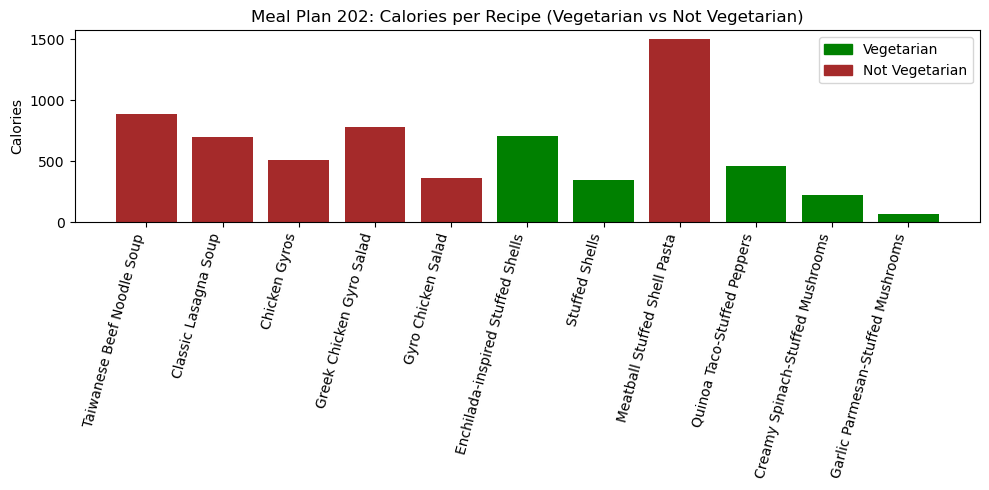

In [ ]:
import matplotlib.pyplot as plt

# Making sure Calories are numeric
df["Calories"] = pd.to_numeric(df["Calories"], errors="coerce")

# Dropping rows that are missing the calorie info
df = df.dropna(subset=["Calories"])

# Making a bar chart
plt.figure(figsize=(10,5))
plt.bar(
    df["Tasty Recipe"],
    df["Calories"],
    color=df["Vegetarian"].map({"Vegetarian": "green", "Not Vegetarian": "brown"})
)

plt.xticks(rotation=75, ha="right")
plt.ylabel("Calories")
plt.title("Meal Plan (202): Calories in Recipes (Vegetarian vs Not Vegetarian)")
plt.legend(
    handles=[
        plt.Rectangle((0,0),1,1,color="green",label="Vegetarian"),
        plt.Rectangle((0,0),1,1,color="brown",label="Not Vegetarian")
    ]
)
plt.tight_layout()
plt.show()


**Analysis:** This graph highlights the amount of calories for different meals, both vegetarian and not vegetarian. This may help consumers decide which meals would be best to eat based on their nutritional needs. 